In [1]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
X = np.load('../input/pickle-wav-cough-classification/X.pkl', allow_pickle=True)
Y = np.load('../input/pickle-wav-cough-classification/Y_old.pkl', allow_pickle=True)

In [3]:
X

array([[2.89615750e-01, 1.05253726e-01, 5.93493395e-02, ...,
        1.88220444e-03, 4.31703607e-04, 2.30146434e-05],
       [6.21155538e-02, 2.10357979e-02, 1.27448663e-02, ...,
        1.38998333e-08, 4.70543826e-09, 4.17345186e-10],
       [3.02631990e-04, 2.33808925e-04, 8.38512613e-04, ...,
        1.11880305e-03, 3.19325947e-04, 1.76634858e-05],
       ...,
       [1.26186684e-01, 3.87993231e-02, 2.02403609e-02, ...,
        1.83137803e-04, 6.03376830e-05, 4.81652069e-06],
       [7.16541484e-02, 7.86676351e-03, 2.42731092e-03, ...,
        2.47372045e-05, 6.03010722e-06, 3.38482863e-07],
       [1.84480762e+00, 1.36250898e-01, 1.43176718e-02, ...,
        4.98062462e-01, 1.80927873e-01, 1.89950746e-02]])

In [4]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [5]:
#a = [list(ele) for ele in Y]

# fruits = [[1], [0], [1]]
# fruits.append([0])

# new_list = []
# for ele in Y:
#     new_list.append([ele])
    
# arr = np.array(new_list)

In [6]:
'''Final Data'''
print(X.shape)
print(Y.shape)

(13244, 128)
(13244, 2)


In [7]:
type(Y)

numpy.ndarray

In [8]:
type(X)

numpy.ndarray

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [10]:
X_train = X_train.reshape(9933, 16, 8, 1)
X_test = X_test.reshape(3311, 16, 8, 1)

In [11]:
input_dim = (16, 8, 1)

In [12]:
#Plan to use pycaret for best model
#How to reduce overfitting on the validation dataset

In [13]:
#pip install keras

In [14]:
from keras.layers.normalization.layer_normalization import *
from keras.layers.normalization.batch_normalization import *

In [15]:
#pip install autokeras

In [16]:
type(X_train)

numpy.ndarray

In [17]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [18]:
#Y_train=np.argmax(Y_train,axis=1)

In [19]:
# import autokeras as ak
# model = ak.ImageClassifier(max_trial = 100)
# model.fit(X_train, Y_train)

## Creating Keras Model and Testing

**Model 1:**
* CNN 2D with 64 units and tanh activation.
* MaxPool2D with 2*2 window.
* CNN 2D with 128 units and tanh activation.
* MaxPool2D with 2*2 window.
* Dropout Layer with 0.2 drop probability.
* DL with 1024 units and tanh activation.
* DL 10 units with softmax activation.
* Adam optimizer with categorical_crossentropy loss function.
* 90 epochs have been used.

In [20]:
model = Sequential()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [21]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
#model.fit(X_train, Y_train, epochs = 5, batch_size = 200, validation_data = (X_test, Y_test))
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, validation_data = (X_test, Y_test))

2022-01-24 13:42:37.573418: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
199/199 [==============================] - 5s 20ms/step - loss: 0.1572 - accuracy: 0.9654 - val_loss: 0.1443 - val_accuracy: 0.9653
Epoch 2/10
199/199 [==============================] - 4s 18ms/step - loss: 0.1161 - accuracy: 0.9680 - val_loss: 0.1252 - val_accuracy: 0.9644
Epoch 3/10
199/199 [==============================] - 4s 19ms/step - loss: 0.1061 - accuracy: 0.9695 - val_loss: 0.1318 - val_accuracy: 0.9650
Epoch 4/10
199/199 [==============================] - 4s 19ms/step - loss: 0.0963 - accuracy: 0.9709 - val_loss: 0.1252 - val_accuracy: 0.9656
Epoch 5/10
199/199 [==============================] - 4s 19ms/step - loss: 0.0888 - accuracy: 0.9730 - val_loss: 0.1142 - val_accuracy: 0.9635
Epoch 6/10
199/199 [==============================] - 4s 19ms/step - loss: 0.0871 - accuracy: 0.9747 - val_loss: 0.1162 - val_accuracy: 0.9662
Epoch 7/10
199/199 [==============================] - 4s 20ms/step - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.1161 - val_accuracy: 0.9650

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [25]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

104/104 [==============================] - 0s 4ms/step - loss: 0.1456 - accuracy: 0.9592
[0.14564299583435059, 0.9592268466949463]


In [26]:
#Display of the accuracy and the loss values
import plotly.express as px
df = pd.DataFrame.from_dict(history.history)
fig = px.line(df, x=df.index, y=df.columns, title="Learning Curve - Loss/accuracy", labels={'index':'Epochs', 'value':'Loss'})
fig.show()

## Train-Validation Loss

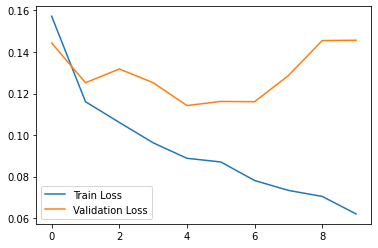

In [27]:
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

## Train-Validation Accuracy

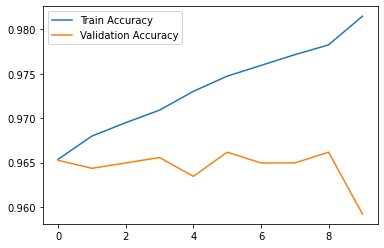

In [28]:
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

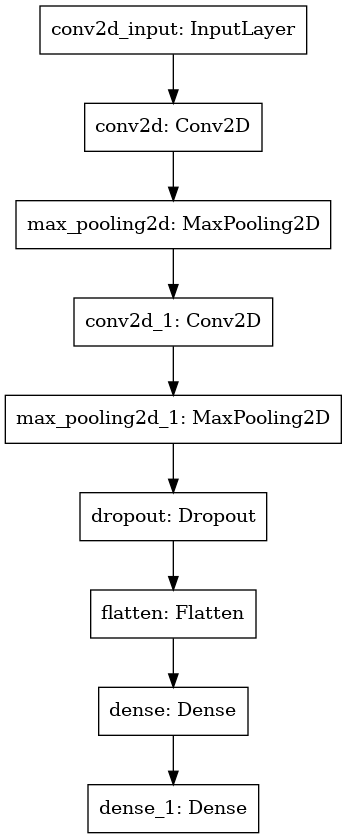

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [30]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
#Y_pred = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)
Y_test = np.argmax(Y_test, axis = 1)
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))
print(classification_report(Y_test, Y_pred))

the accuracy obtained on the test set is: 0.959226819691936
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3196
           1       0.40      0.34      0.37       115

    accuracy                           0.96      3311
   macro avg       0.69      0.66      0.67      3311
weighted avg       0.96      0.96      0.96      3311



In [32]:
#https://www.kaggle.com/himanshu007121/urbansound8k-classification
#https://www.kaggle.com/umutalpaydn/image-classification-with-cnn
#https://www.kaggle.com/venugopalvasarla/using-basic-cnn-for-natural-image-classification